# 三维向量

## 绘制三维向量

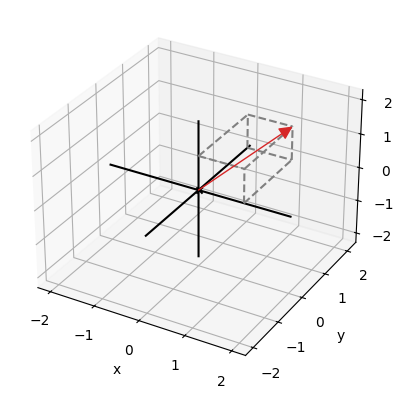

In [2]:
from py_lib.draw3d import draw3d, Arrow3D, Box3D

draw3d(
    Arrow3D((1, 2, 1), (0, 0, 0)),
    Box3D(1, 2, 1)
)

## 三维向量的运算

### 三维向量加法

In [3]:
def add(*vectors):
    """
    支持对多个维度的多个向量求和
    :param vectors: 向量列表
    :return: 向量的和
    """
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)


print(f'三维向量加法：add((1, 2, 3), (4, 5, 6)) = {add((1, 2, 3), (4, 5, 6))}')
print(f'五维向量加法：add((1, 2, 3, 4, 5), (6, 7, 8, 9, 10)) = {add((1, 2, 3, 4, 5), (6, 7, 8, 9, 10))}')

三维向量加法：add((1, 2, 3), (4, 5, 6)) = (5, 7, 9)
五维向量加法：add((1, 2, 3, 4, 5), (6, 7, 8, 9, 10)) = (7, 9, 11, 13, 15)


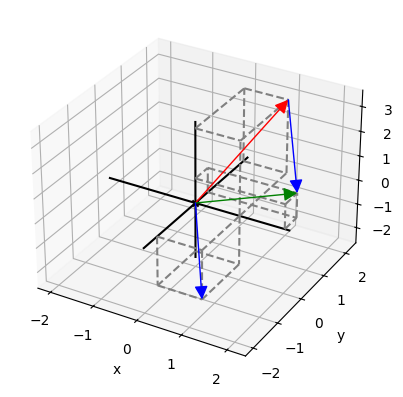

In [4]:
draw3d(
    # 红色箭头向量1
    Arrow3D((1, 2, 3), (0, 0, 0), color='red'),
    Box3D(1, 2, 3),
    # 蓝色箭头向量2
    Arrow3D((1, -1.5, -2), (0, 0, 0), color='blue'),
    Box3D(1, -1.5, -2),
    # 移动蓝色箭头向量2到红色箭头向量1的尾部
    Arrow3D((2, 0.5, 1), (1, 2, 3), color='blue'),
    # 绿色箭头向量1+向量2的和
    Arrow3D(add((1, 2, 3), (1, -1.5, -2)), (0, 0, 0), color='green'),
    Box3D(*add((1, 2, 3), (1, -1.5, -2)))
)

可以看到，三维向量的加法与二维向量的加法类似，也是将一个向量的起点移动到另一个向量的终点，然后连接两个向量的起点和终点，得到一个新的向量。

### 三维向量减法

In [5]:
def subtract(*vectors):
    """
    向量减法
    :param vectors:
    :return:
    """
    by_coordinate = zip(*vectors)
    coordinate_diffs = [coords[0] - sum(coords[1:]) for coords in by_coordinate]
    return tuple(coordinate_diffs)


print(f'三维向量减法：subtract((1, 2, 3), (4, 5, 6)) = {subtract((1, 2, 3), (4, 5, 6))}')
print(f'五维向量减法：subtract((1, 2, 3, 4, 5), (6, 7, 8, 9, 10)) = {subtract((1, 2, 3, 4, 5), (6, 7, 8, 9, 10))}')

三维向量减法：subtract((1, 2, 3), (4, 5, 6)) = (-3, -3, -3)
五维向量减法：subtract((1, 2, 3, 4, 5), (6, 7, 8, 9, 10)) = (-5, -5, -5, -5, -5)


### 三维向量数乘

In [6]:
def scalar_multiply(scalar, *vectors):
    """
    向量数乘
    :param scalar: 标量
    :param vectors: 向量列表
    :return: 向量的数乘
    """
    by_coordinate = zip(*vectors)
    scalar_product = [scalar * sum(coords) for coords in by_coordinate]
    return tuple(scalar_product)


print(f'三维向量数乘：scalar_multiply(2, (1, 2, 3)) = {scalar_multiply(2, (1, 2, 3))}')
print(f'五维向量数乘：scalar_multiply(2, (1, 2, 3, 4, 5)) = {scalar_multiply(2, (1, 2, 3, 4, 5))}')

三维向量数乘：scalar_multiply(2, (1, 2, 3)) = (2, 4, 6)
五维向量数乘：scalar_multiply(2, (1, 2, 3, 4, 5)) = (2, 4, 6, 8, 10)


### 三维向量的长度

计算二维向量的长度需要使用勾股定理，计算三维向量的长度同样需要使用勾股定理。

首先需要计算出三维向量在 $x$ 和 $y$ 轴上的投影的长度：

$$
proj_{xy}\|\vec{v}\| = \sqrt{x^2 + y^2}
$$

然后使用这个投影的长度和 $z$ 轴上的长度计算三维向量的长度：

$$
\|\vec{v}\| = \sqrt{proj_{xy}\|\vec{v}\|^2 + z^2}
$$

最后可以得出三维向量的长度公式：

$$
\|\vec{v}\| = \sqrt{(\sqrt{x^2 + y^2})^2 + z^2} = \sqrt{x^2 + y^2 + z^2}
$$

In [7]:
import math


def three_dimensional_vector_length(vector):
    """
    计算三维向量的长度
    :param vector: 三维向量
    :return: 三维向量的长度
    """
    return math.sqrt(sum(coord ** 2 for coord in vector))


print(f'三维向量的长度：three_dimensional_vector_length((1, 2, 3)) = {three_dimensional_vector_length((1, 2, 3))}')

三维向量的长度：three_dimensional_vector_length((1, 2, 3)) = 3.7416573867739413


## 三维向量球坐标

二维笛卡尔坐标转换为极坐标的公式如下：

$$
(r, \theta) = (\sqrt{x^2 + y^2}, \arctan(\frac{y}{x}))
$$

在三维空间中，可以使用球坐标来表示一个向量，球坐标使用一个长度、一个极角和一个方位角来表示一个向量。

球坐标的长度是向量的长度，极角是向量与 $z$ 轴的夹角，方位角是向量在 $x$ 和 $y$ 投影的夹角。

可以使用上面的二维笛卡尔坐标转换为极坐标的公式来计算三维向量的长度和极角，然后使用下面的公式计算方位角：

$$
\phi = \arctan(\frac{z}{proj_{xy}\|\vec{v}\|})
$$

$$
\phi = \arctan(\frac{z}{\sqrt{x^2 + y^2}})
$$

根据上面的公式可以得出三维向量的球坐标公式：

$$
(r, \theta, \phi) = (\sqrt{x^2 + y^2 + z^2}, \arctan(\frac{y}{x}), \arctan(\frac{z}{\sqrt{x^2 + y^2}}))
$$


In [8]:
def cartesian_to_spherical(vector):
    """
    笛卡尔坐标转球坐标
    :param vector: 三维向量
    :return: 球坐标
    """
    x, y, z = vector
    r = three_dimensional_vector_length(vector)
    theta = math.atan2(y, x)
    phi = math.atan2(z, math.sqrt(x ** 2 + y ** 2))
    return r, theta, phi

print(f'三维向量 (1, 2, 3) 的球坐标为：{cartesian_to_spherical((1, 2, 3))}')

三维向量 (1, 2, 3) 的球坐标为：(3.7416573867739413, 1.1071487177940904, 0.9302740141154721)
